# BF550 Project II
## Dylan Tamayo

In [2]:
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


# Figure 1C

In [16]:
# Load RNA and integrated assays.
adata = sc.read_h5ad('FILENAME')
integrated_adata = sc.read_h5ad('FILENAME')

adata

AnnData object with n_obs × n_vars = 139446 × 22067
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pct_mito', 'num_UMIs', 'num_genes', 'doublet_score_scDblFinder', 'res.0.1', 'res.0.2', 'res.0.3', 'res.0.4', 'res.0.6', 'res.0.7', 'res.0.8', 'res.0.9', 'res.1', 'res.1.2', 'res.1.4', 'res.1.6', 'res.1.8', 'res.1.9', 'res.2', 'res.3', 'res.5', 'res.7', 'res.9', 'age', 'sex', 'surgery', 'procedure', 'treatment_type', 'treatment', 'stage', 'subtype_moffitt', 'KRAS', 'TP53', 'CDKN2A', 'SMAD4', 'celltypeFig1', 'celltypeFig3', 'celltypeFig4A', 'celltypeFig4C', 'celltypeFig5'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [17]:
integrated_adata

AnnData object with n_obs × n_vars = 139446 × 1999
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pct_mito', 'num_UMIs', 'num_genes', 'doublet_score_scDblFinder', 'res.0.1', 'res.0.2', 'res.0.3', 'res.0.4', 'res.0.6', 'res.0.7', 'res.0.8', 'res.0.9', 'res.1', 'res.1.2', 'res.1.4', 'res.1.6', 'res.1.8', 'res.1.9', 'res.2', 'res.3', 'res.5', 'res.7', 'res.9', 'age', 'sex', 'surgery', 'procedure', 'treatment_type', 'treatment', 'stage', 'subtype_moffitt', 'KRAS', 'TP53', 'CDKN2A', 'SMAD4', 'celltypeFig1', 'celltypeFig3', 'celltypeFig4A', 'celltypeFig4C', 'celltypeFig5'
    var: 'name'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


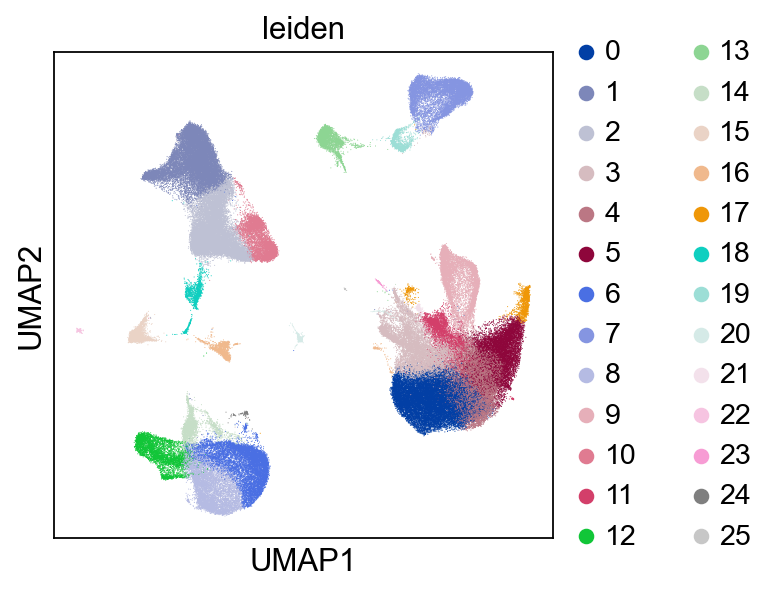

In [5]:
# In integrated assay, conduct PCA, UMAP, and Leiden clustering.
sc.pp.pca(integrated_adata)
sc.pp.neighbors(integrated_adata, n_neighbors=30)
sc.tl.umap(integrated_adata, min_dist=0.3)
sc.tl.leiden(integrated_adata, resolution=1)
sc.pl.umap(integrated_adata, color='leiden')

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to 

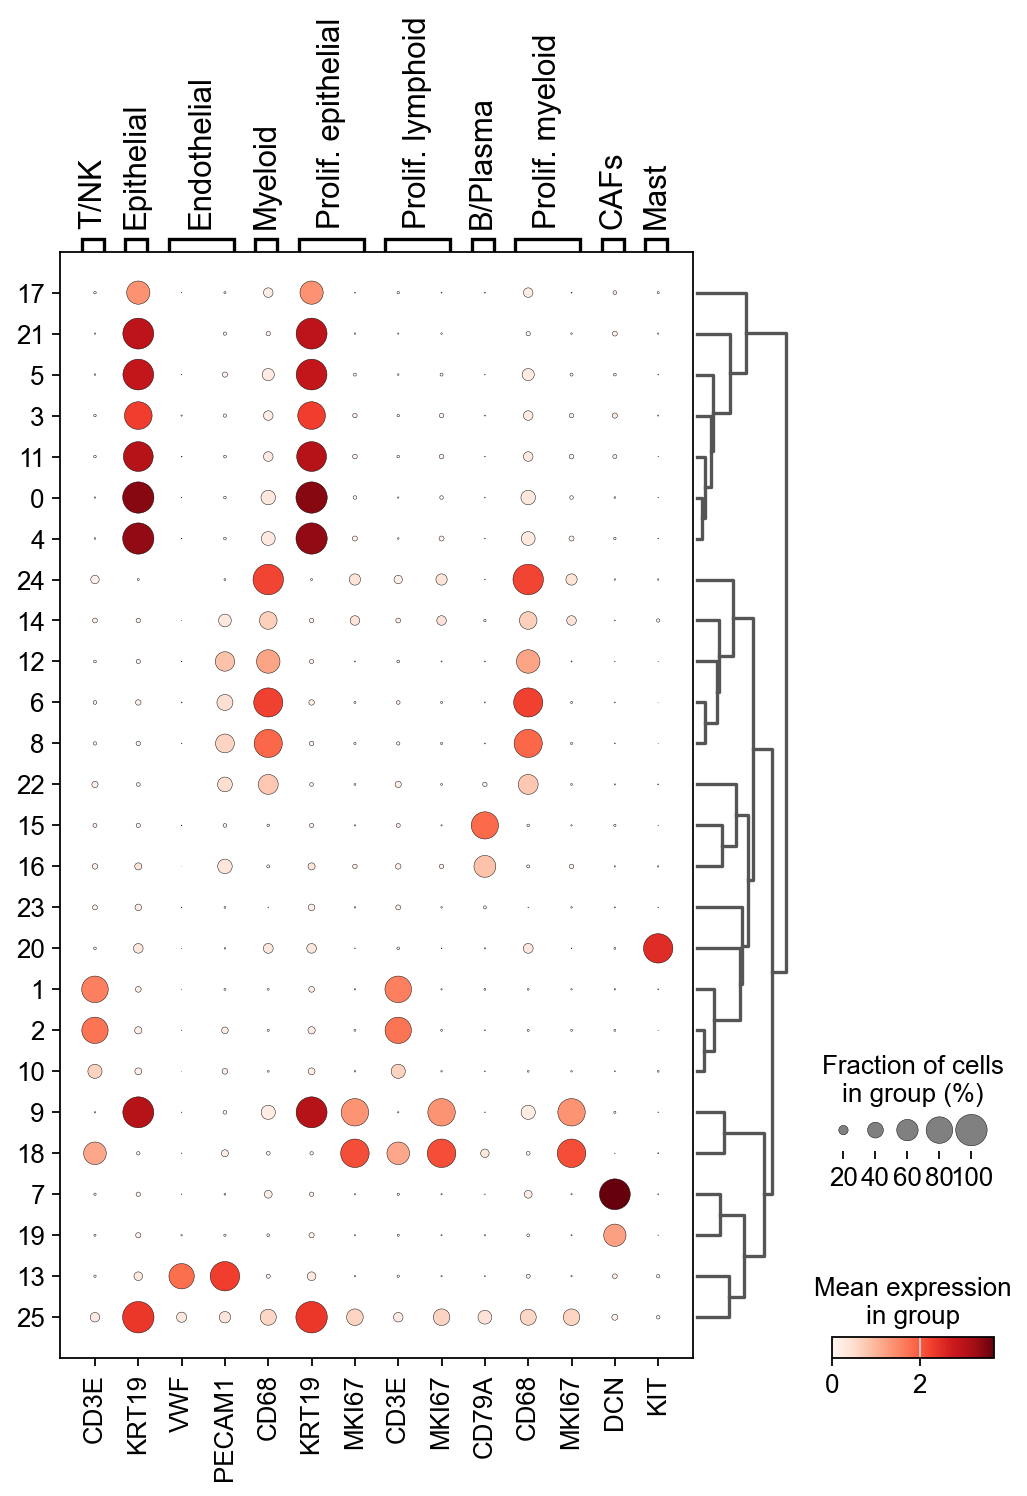

In [6]:
# Using integrated assay clustering, plot expression for marker genes in RNA assay.
# Group clusters with similar expression programs using dendrogram.
adata.obs['leiden'] = integrated_adata.obs['leiden']
sc.tl.dendrogram(adata, groupby='leiden')
marker_genes_dict = {'T/NK': 'CD3E', 'Epithelial': 'KRT19',
              'Endothelial': ['VWF', 'PECAM1'], 'Myeloid': 'CD68',
              'Prolif. epithelial': ['KRT19', 'MKI67'], 'Prolif. lymphoid': ['CD3E', 'MKI67'],
              'B/Plasma': 'CD79A', 'Prolif. myeloid': ['CD68', 'MKI67'],
              'CAFs': 'DCN', 'Mast': 'KIT'
              }

sc.pl.dotplot(adata, marker_genes_dict, groupby='leiden', dendrogram=True)

In [7]:
# Annotate clusters from marker gene expression.
cluster_annotation_fig1 = {
    '0': 'Epithelial', '1': 'T/NK', '2': 'T/NK', '3': 'Epithelial',
    '4': 'Epithelial', '5': 'Epithelial', '6': 'Myeloid', '7': 'CAFs',
    '8': 'Myeloid', '9': 'Prolif. epithelial', '10': 'T/NK', '11': 'Epithelial',
    '12': 'Myeloid', '13': 'Endothelial', '14': 'Prolif. myeloid', '15': 'B/Plasma',
    '16': 'B/Plasma', '17': 'Epithelial', '18': 'Prolif. lymphoid', '19': 'CAFs',
    '20': 'Mast', '21': 'Epithelial', '22': 'Myeloid', '23': 'Epithelial',
    '24': 'Myeloid', '25': 'Prolif. epithelial'
}

# Map annotations to leiden clusters in integrated assay.
integrated_adata.obs['dlt_celltype'] = integrated_adata.obs['leiden'].map(cluster_annotation_fig1).astype('category')

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

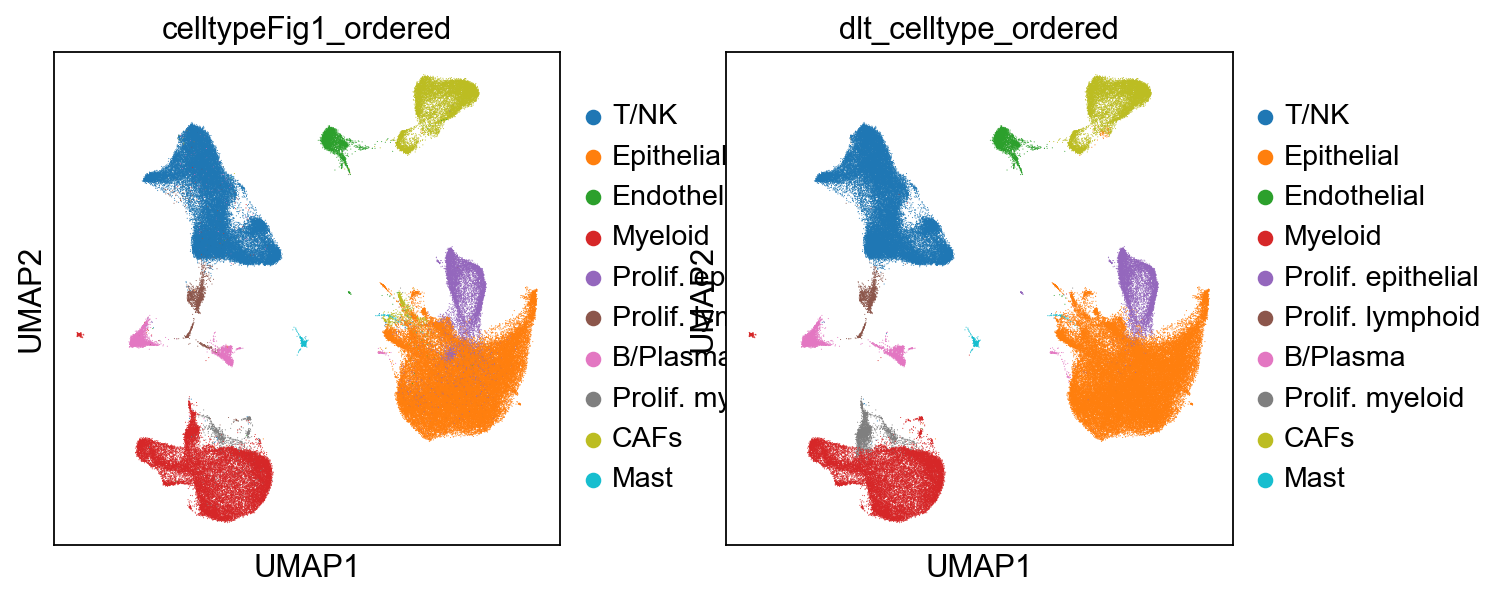

In [8]:
# Plot UMAP of original cluster labels to compare with new UMAP.
order = ['T/NK', 'Epithelial', 'Endothelial', 'Myeloid', 'Prolif. epithelial',
         'Prolif. lymphoid', 'B/Plasma', 'Prolif. myeloid', 'CAFs', 'Mast']

integrated_adata.obs['celltypeFig1_ordered'] = pd.Categorical(
    values=integrated_adata.obs.celltypeFig1, categories=order, ordered=True)
integrated_adata.obs['dlt_celltype_ordered'] = pd.Categorical(
    values=integrated_adata.obs.dlt_celltype, categories=order, ordered=True)

sc.pl.umap(integrated_adata, color=['celltypeFig1_ordered', 'dlt_celltype_ordered'], palette='tab10')

# Figure 3A

In [9]:
# Subset CAF cell cluster from RNA and integrated assays.
adata.obs['dlt_celltype'] = integrated_adata.obs['dlt_celltype']
cafs = adata[(adata.obs['dlt_celltype'] == 'CAFs')]
integrated_cafs = integrated_adata[integrated_adata.obs['dlt_celltype'] == 'CAFs']

cafs.obs['dlt_celltype']

0171-8-13-20-T:AAGACAAAGGGTCTTT    CAFs
0171-8-13-20-T:AAGACTCTCTTGAGCA    CAFs
0171-8-13-20-T:AATCACGAGTGGAAGA    CAFs
0171-8-13-20-T:AGATGCTAGTCACTAC    CAFs
0171-8-13-20-T:AGGGAGTTCCTAGCCT    CAFs
                                   ... 
Nov-6115-d0:TGCCAAACATTCGACA       CAFs
Nov-6115-d0:TGGCCAGTCAGTTCGA       CAFs
Nov-6115-d0:TGGTTCCAGACAGAGA       CAFs
Nov-6115-d0:TTGAACGTCTCATTCA       CAFs
Nov-6115-d0:TTTGCGCTCATCATTC       CAFs
Name: dlt_celltype, Length: 9133, dtype: category
Categories (1, object): ['CAFs']

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


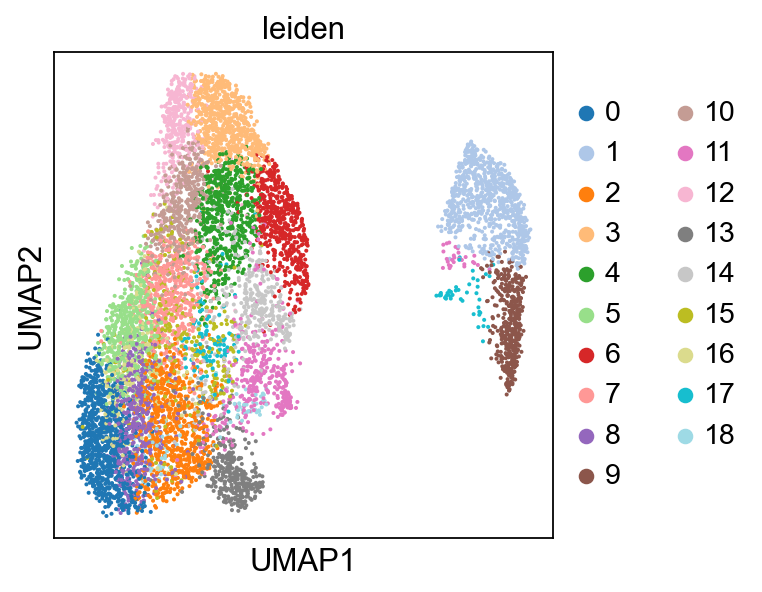

In [10]:
# In integrated CAF assay, conduct PCA, UMAP, and Leiden clustering.
sc.pp.pca(integrated_cafs)
sc.pp.neighbors(integrated_cafs, n_neighbors=30)
sc.tl.umap(integrated_cafs, min_dist=0.3)
sc.tl.leiden(integrated_cafs, resolution=2)
sc.pl.umap(integrated_cafs, color='leiden', palette='tab20')

/var/folders/tz/30nwls9j5xn5nv008g9ngw4w0000gn/T/ipykernel_21235/4190775402.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  cafs.obs['integrated_leiden'] = integrated_cafs.obs['leiden']
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **pass

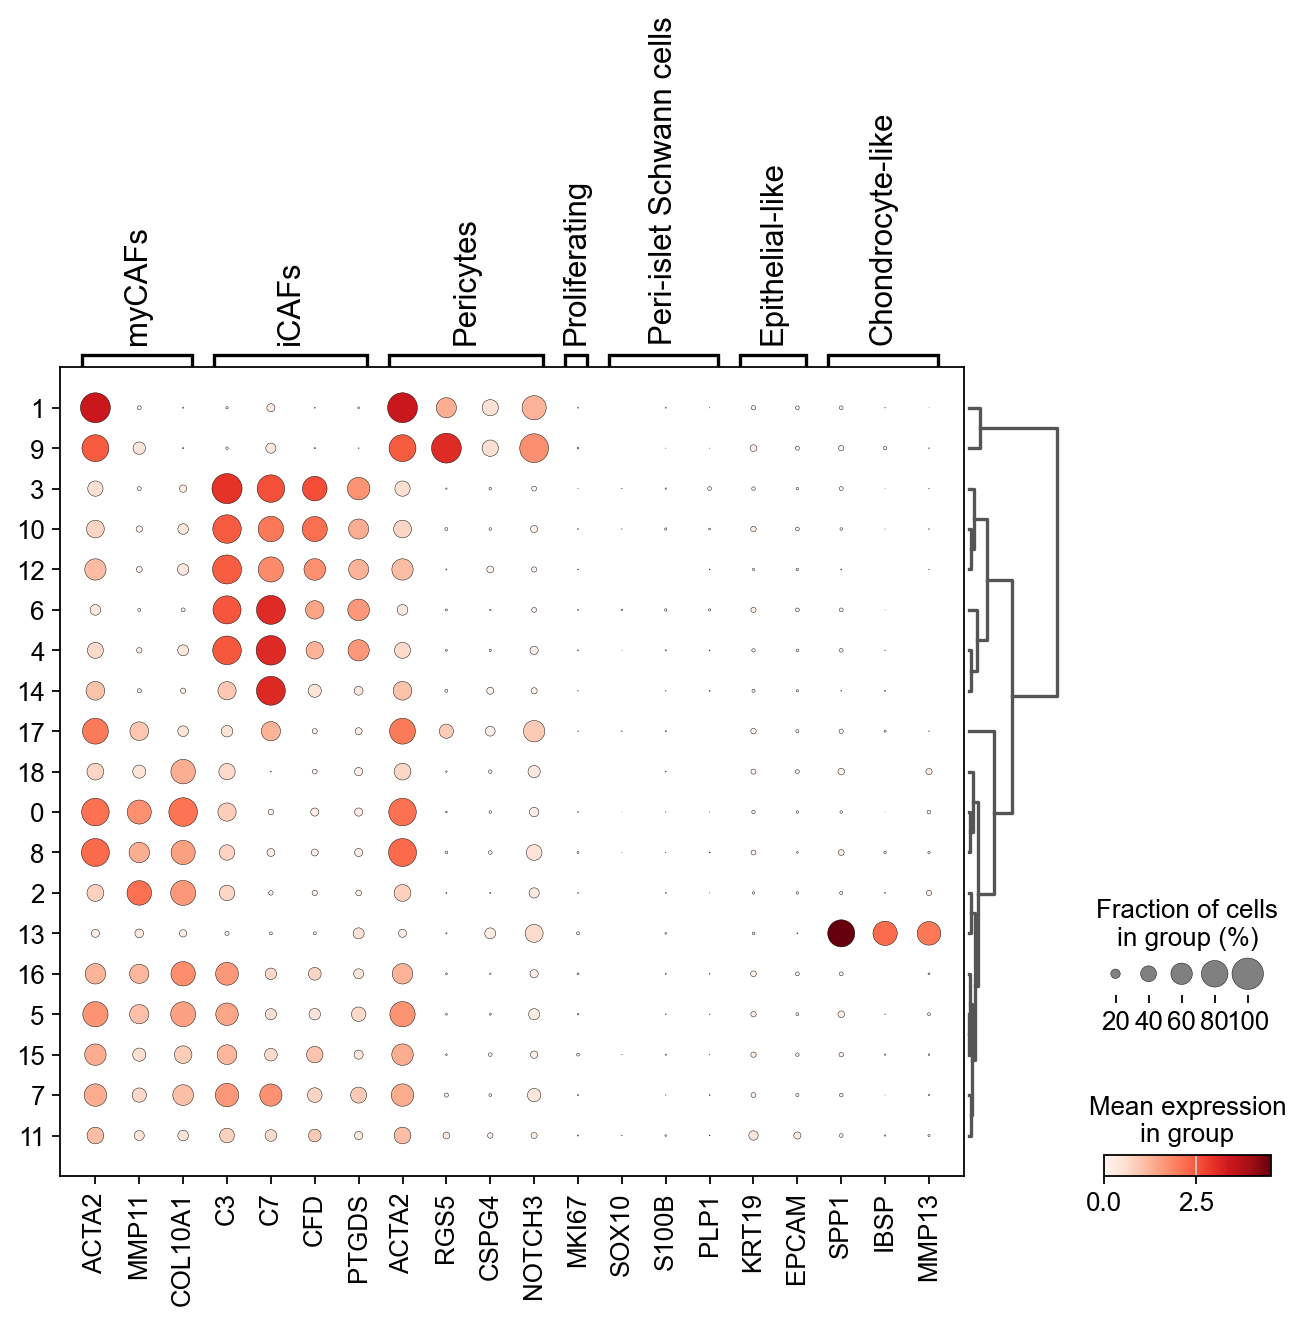

In [11]:
# Using integrated CAF assay clustering, plot expression for marker genes
# in RNA CAF assay.
# Group clusters with similar expression programs using dendrogram.
cafs.obs['integrated_leiden'] = integrated_cafs.obs['leiden']
sc.tl.dendrogram(cafs, groupby='integrated_leiden')
sc.tl.rank_genes_groups(cafs, groupby='integrated_leiden', method='wilcoxon', corr_method='bonferroni')
caf_marker_genes = {
    'myCAFs': ['ACTA2', 'MMP11', 'COL10A1'],
    'iCAFs': ['C3', 'C7', 'CFD', 'PTGDS'],
    'Pericytes': ['ACTA2', 'RGS5', 'CSPG4', 'NOTCH3'],
    'Proliferating': ['MKI67'],
    'Peri-islet Schwann cells': ['SOX10', 'S100B', 'PLP1'],
    'Epithelial-like': ['KRT19', 'EPCAM'],
    'Chondrocyte-like': ['SPP1', 'IBSP', 'MMP13']
    }
sc.pl.dotplot(cafs, caf_marker_genes, groupby='integrated_leiden', dendrogram=True)

In [12]:
# Annotate CAF subtype clusters from marker gene expression.
cluster_annotation_fig3 = {
    '0': 'myCAFs' ,'1': 'Pericytes', '2': 'myCAFs', '3': 'iCAFs',
    '4': 'iCAFs', '5': 'myCAFs', '6': 'iCAFs', '7': 'iCAFs',
    '8': 'myCAFs', '9': 'Pericytes', '10': 'iCAFs', '11': 'Epithelial-like',
    '12': 'iCAFs', '13': 'Chondrocyte-like', '14': 'iCAFs', '15': 'myCAFs',
    '16': 'myCAFs', '17': 'myCAFs', '18': 'myCAFs',
}

# Map annotations to leiden clusters in integrated CAF assay.
cafs.obs['dlt_celltype_fig3'] = cafs.obs['integrated_leiden'].map(cluster_annotation_fig3).astype('category')
integrated_cafs.obs['dlt_celltype_fig3'] = cafs.obs['dlt_celltype_fig3']

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


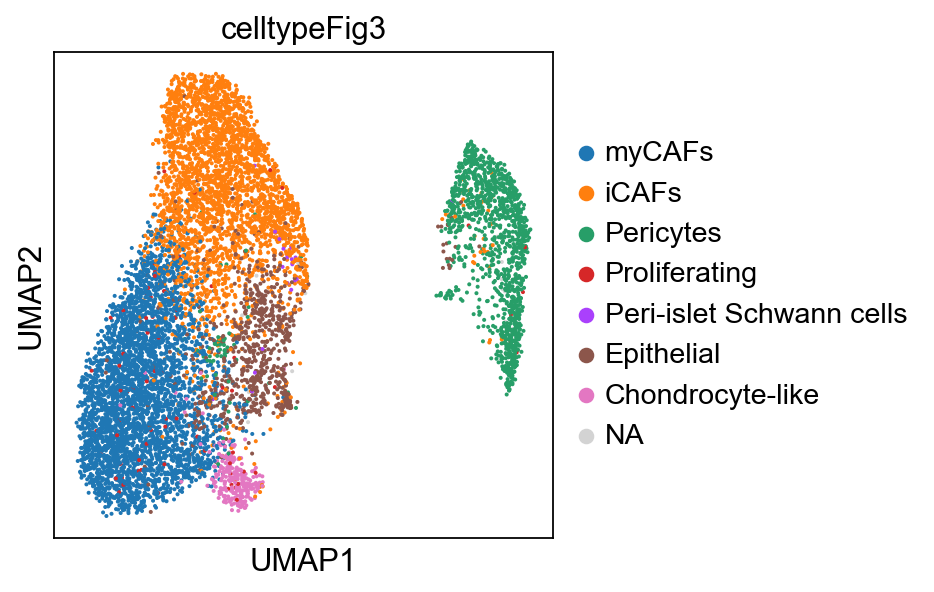

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


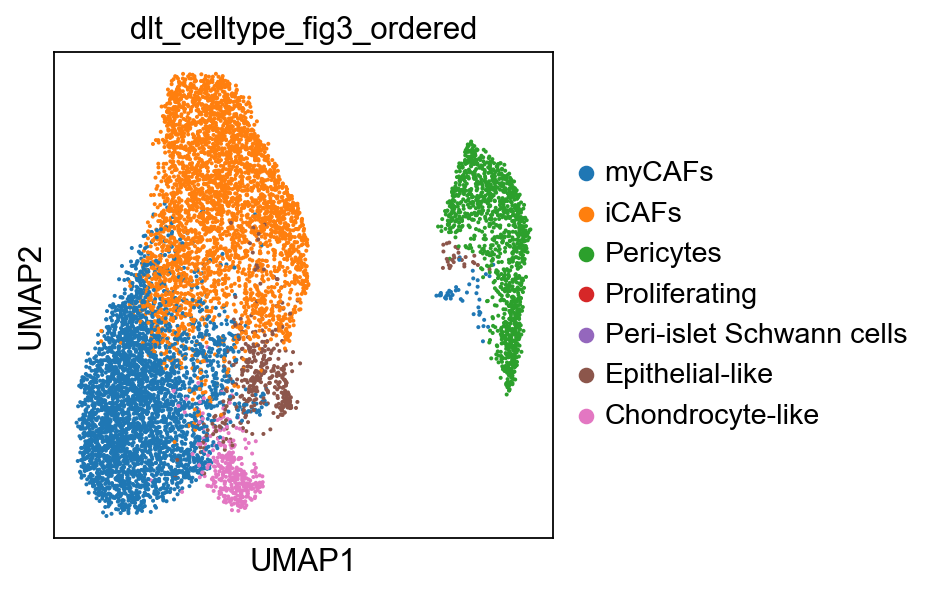

In [13]:
# Plot UMAP of original CAF cluster labels to compare with new UMAP.
color_dict_fig3 = {'myCAFs': '#1f77b4', 'iCAFs': '#ff7f0e', 'Pericytes': '#2ca02c',
                   'Proliferating': '#d62728', 'Peri-islet Schwann cells': '#9467bd',
                   'Epithelial-like': '#8c564b', 'Chondrocyte-like': '#e377c2'
                   }
fig3_groups = ['myCAFs', 'iCAFs', 'Pericytes', 'Proliferating',
               'Peri-islet Schwann cells', 'Epithelial-like', 'Chondrocyte-like']

integrated_cafs.obs['dlt_celltype_fig3_ordered'] = pd.Categorical(
    values=integrated_cafs.obs.dlt_celltype_fig3, categories=fig3_groups, ordered=True)

sc.pl.umap(integrated_cafs, color='celltypeFig3')
sc.pl.umap(integrated_cafs, color='dlt_celltype_fig3_ordered', palette=color_dict_fig3)

integrated_cafs.obs.drop('dlt_celltype_fig3_ordered', axis=1, inplace=True)

# Figure 3B

In [14]:
# Rank top genes expressed in each CAF group and output as dataframe.
sc.tl.rank_genes_groups(cafs, groupby='dlt_celltype_fig3', method='wilcoxon', corr_method='bonferroni')
de_gene_df = sc.get.rank_genes_groups_df(cafs, group=None)

# For each CAF subtype, append top 5 genes to 
# Proliferating and peri-islet Schwann cells are excluded.
fig3_groups = ['myCAFs', 'iCAFs', 'Pericytes', 'Epithelial-like', 'Chondrocyte-like']
fig3_top_genes = []
for group in fig3_groups:
    subset = de_gene_df[de_gene_df['group'] == group]
    fig3_top_genes += list(subset.iloc[0:5]['names'])

/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/opt/homebrew/Caskroom/miniconda/base/envs/bf550/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


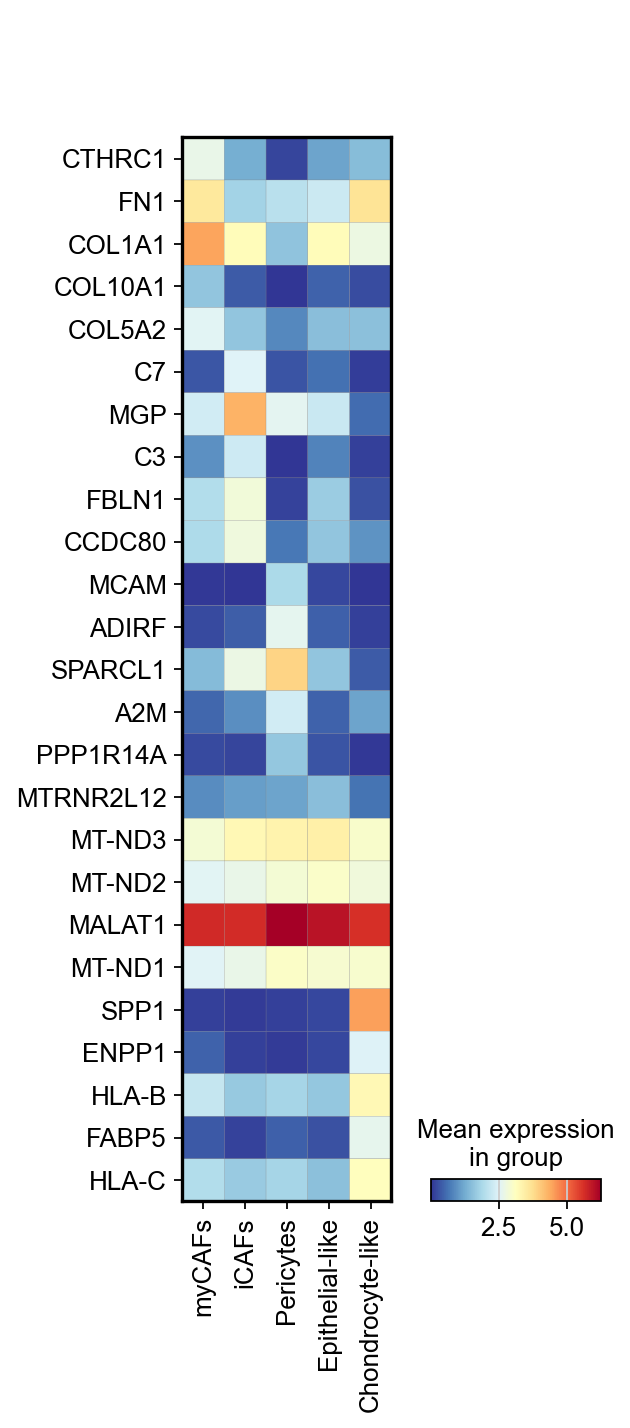

In [15]:
# Plot matrix of expression of top genes across all detected CAF clusters.
cafs.obs['dlt_celltype_fig3_ordered'] = pd.Categorical(
    values=cafs.obs.dlt_celltype_fig3, categories=fig3_groups, ordered=True)

sc.pl.matrixplot(cafs, fig3_top_genes, groupby='dlt_celltype_fig3_ordered', cmap='RdYlBu_r', swap_axes=True)  